The process time necessary to obtain a solid residue concentration of 200.0 [kg/l] is: [17.32867951] [h]


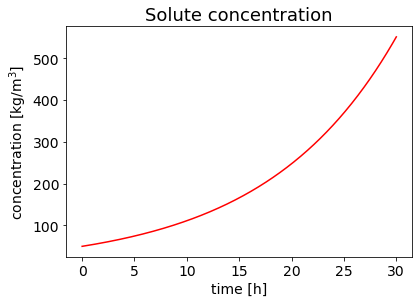

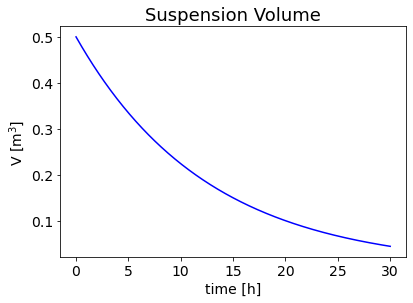

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# Parameters: 
N = 500 #number of points
time = np.linspace(0, 30, N)

#Every length in m

A=20;  #m^2
B=0.1;
C0=0.05*1E3; #kg /l * dm^3/m^3
V0=500*1E-3; #l * m^3/dm^3

C_specific = 0.2*1E3

#Operating Equation
C = C0*np.exp(B*A/V0/C0*time) 
V = V0*np.exp(-B*A/V0/C0*time) 

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(time,C, marker=' ' , color='r')

plt.title('Solute concentration', fontsize=18);
axes.set_xlabel('time [h]', fontsize=14);
axes.set_ylabel('concentration [kg/m$^3$]',fontsize=14);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(time,V, marker=' ' , color='b')

plt.title('Suspension Volume', fontsize=18);
axes.set_xlabel('time [h]', fontsize=14);
axes.set_ylabel('V [m$^3$]',fontsize=14);


def equation(proc_time):
    eq1 = C0*np.exp(B*A/V0/C0*proc_time) - C_specific
    return eq1

process_time = fsolve(equation,[1])

print("The process time necessary to obtain a solid residue concentration of", C_specific, "[kg/l] is:", process_time, "[h]") 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# data: 
A=20;  #[m^2]
B=0.1;
C0=0.05*1E3; #kg /l * dm^3/m^3
V0=500*1E-3; #l * m^3/dm^3
process_time=5; # [h]

Cout=C0+A*B*process_time/V0


print("The steady state concentration is", Cout, "[kg/m^3]") 

The steady state concentration is 70.0 [kg/m^3]


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# data: 
A=20;  
B=0.1;
C0=0.05*1E3; #kg /l * dm^3/m^3
V0=500*1E-3; #l * m^3/dm^3
process_time=5; # [h]


# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([5, 4, 3, 2]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/m^3]") 

The steady state concentration is 1544.4 [kg/m^3]


In [4]:
# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([4]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/m^3]") 

The steady state concentration is 130.0 [kg/m^3]


In [5]:
# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([1, 1, 1, 1]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/m^3]") 

The steady state concentration is 192.07999999999998 [kg/m^3]
